# 구매 요인 분석  
## Decision Tree

Decision Tree 모델을 통하여 온라인 경매 상품의 판매 여부를 예측하고  
소비자의 구매 결정에 각 변수가 미친 영향을 분석한다.

## 모듈 및 데이터 로드

In [1]:
# 모듈 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# 데이터 로드
# csv 파일을 살펴본 결과 carrier(통신사) 컬럼에서 'None'이라고 표기된 값들이 존재함을 발견
# 결측치와 None을 구분해 주기 위해서 keep_default_na 옵션을 활용함 
data = pd.read_csv('galaxy.csv', keep_default_na=False)
data = data.replace({'': np.NaN})

## 데이터 특성 확인

In [3]:
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               1179 non-null   object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [5]:
data.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


In [6]:
fig = px.histogram(data, x='startprice', histnorm='probability density', nbins=20)
fig.show()

In [7]:
fig = px.histogram(data, x='charCountDescription', histnorm='probability density', nbins=20)
fig.show()

In [8]:
fig = px.box(data, x='productline', y='startprice')
fig.show()

## Missing Value 처리 

In [9]:
data.isna().sum() / data.shape[0]

BuyItNow                0.000000
startprice              0.000000
carrier                 0.206061
color                   0.399327
productline             0.000000
noDescription           0.000000
charCountDescription    0.000000
upperCaseDescription    0.000000
sold                    0.000000
dtype: float64

In [10]:
data = data.fillna('Unknown')
data.head(5)

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,Unknown,Galaxy_Note9,contains description,0,0,0
2,0,199.99,Unknown,Unknown,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1


In [11]:
data['carrier'].value_counts()

carrier
None               863
Unknown            306
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: count, dtype: int64

## 카테고리 변수 처리

In [12]:
data[['carrier', 'color', 'productline', 'noDescription']].nunique()

carrier          5
color            8
productline      8
noDescription    2
dtype: int64

In [13]:
data['color'].value_counts()

color
Unknown           593
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: count, dtype: int64

In [14]:
data.loc[data['color'].str.contains('Black'), 'color'] = 'Black'
data['color'].value_counts()

color
Unknown       593
Black         332
White         328
Space Gray    180
Gold           52
Name: count, dtype: int64

In [15]:
data = pd.get_dummies(data, columns = ['carrier', 'color', 'productline', 'noDescription'])
data.head(2)

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold,carrier_AT&T,carrier_None,carrier_Sprint/T-Mobile,carrier_Unknown,carrier_Verizon,...,productline_Galaxy_Note10,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_contains description,noDescription_no description
0,0,199.99,0,0,1,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,235.00,0,0,0,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False


## Decision Tree 모델링

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = data.drop('sold', axis=1)
y = data['sold']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

for i in range(2, 21):
    model = DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f'{i} : {round(accuracy_score(y_test, pred), 4)}')

2 : 0.7609
3 : 0.7407
4 : 0.7744
5 : 0.7643
6 : 0.7643
7 : 0.7609
8 : 0.7475
9 : 0.7239
10 : 0.7374
11 : 0.734
12 : 0.7239
13 : 0.7104
14 : 0.7104
15 : 0.7071
16 : 0.7138
17 : 0.7003
18 : 0.7071
19 : 0.7138
20 : 0.7104


## 예측 및 평가

In [20]:
fmodel = DecisionTreeClassifier(max_depth=4)
fmodel.fit(X_train, y_train)
pred = fmodel.predict(X_test)

In [21]:
accuracy_score(y_test, pred)

0.7744107744107744

## Tree Plot 탐색

[Text(0.5, 0.875, 'BuyItNow <= 0.5\n0.495\n1188\n[653, 535]'),
 Text(0.25, 0.625, 'startprice <= 91.5\n0.33\n661\n[523, 138]'),
 Text(0.125, 0.375, 'productline_Galaxy_S7 <= 0.5\n0.481\n77\n[46, 31]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'upperCaseDescription <= 6.5\n0.299\n584\n[477, 107]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'startprice <= 111.0\n0.372\n527\n[130, 397]'),
 Text(0.625, 0.375, 'startprice <= 63.5\n0.171\n308\n[29, 279]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'startprice <= 205.995\n0.497\n219\n[101, 118]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

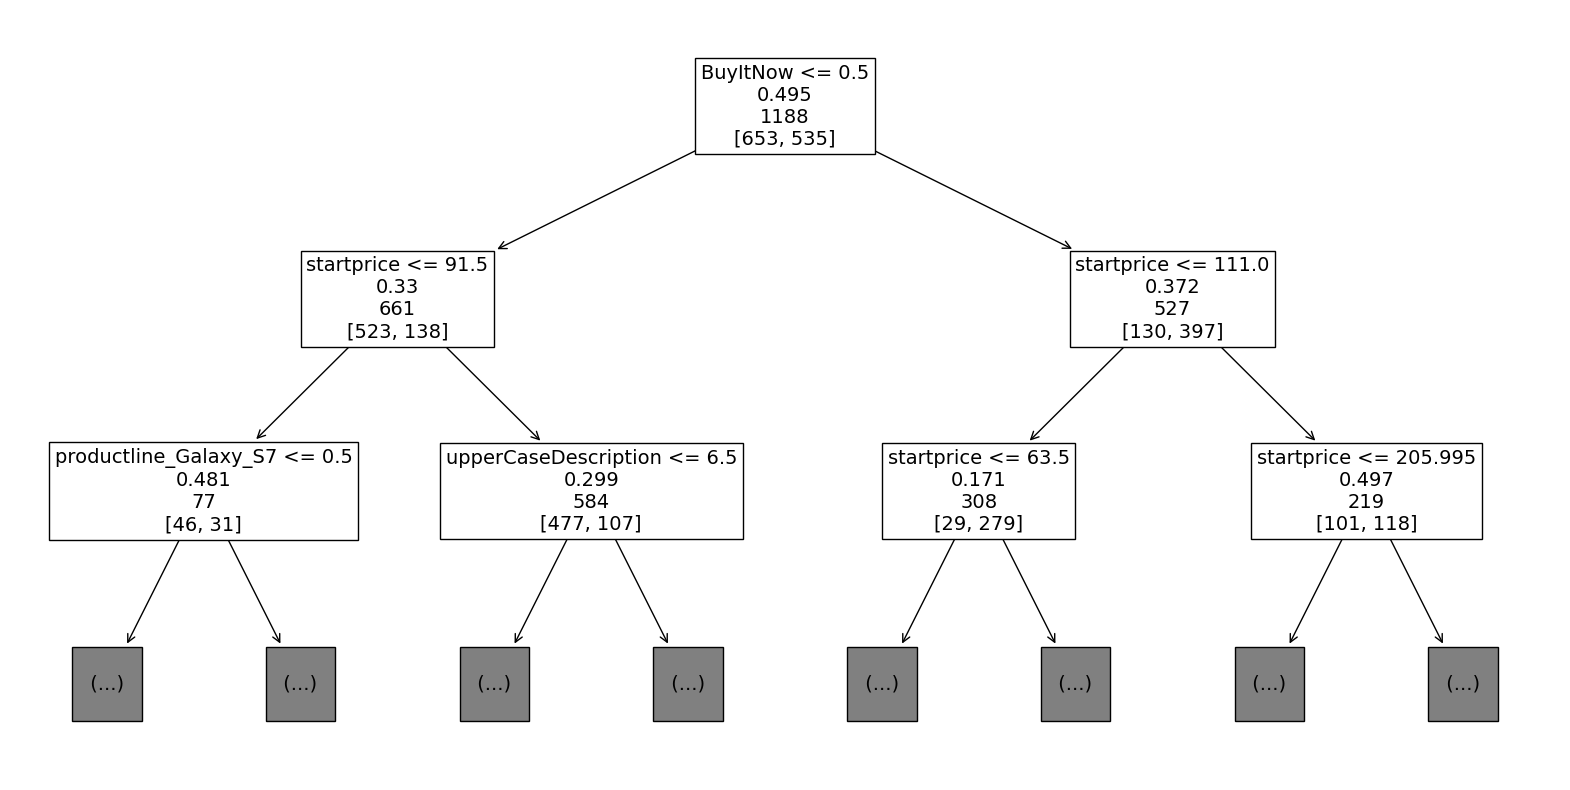

In [22]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(fmodel, feature_names=X_train.columns, label='none', max_depth=2, fontsize=14)